In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [11]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER : ctrl+: ###
settings_paths = [
  # "settings/arpege_winter_30d.yaml", 
  # "settings/arpege_summer_30d.yaml", 
  
  # "settings/ifs_winter_30d.yaml" , 
  # "settings/ifs_summer_30d.yaml" , 
  
  # "settings/mpas_winter_30d.yaml", 
  # "settings/mpas_summer_30d.yaml", 
  # "settings/obs_winter_30d.yaml",
  # "settings/obs_summer_30d.yaml",

  # "settings/screamv1_winter_30d.yaml",
  # "settings/screamv1_winter_30d.yaml", 
 
  # "settings/sam_winter_30d.yaml", 
  # "settings/sam_summer_30d.yaml", 
  # "settings/um_winter_30d.yaml",
  # "settings/um_summer_30d.yaml"

    "settings/xshield_winter_30d.yaml" , 
    "settings/fv3_summer_30d.yaml", 
    
    "settings/geos_winter_30d.yaml", 
    "settings/grist_winter_30d.yaml", 
#     "settings/nicam_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

# lm = grs[0].get_landmask()
# ocean = lm.Landmask == 0
# ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


Found grid attributes file , so loading /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


MPAS_Winter_lowRes_Tropics
MPAS_Summer_lowRes_Tropics
OBS_Winter_lowRes_Tropics
OBS_Summer_lowRes_Tropics


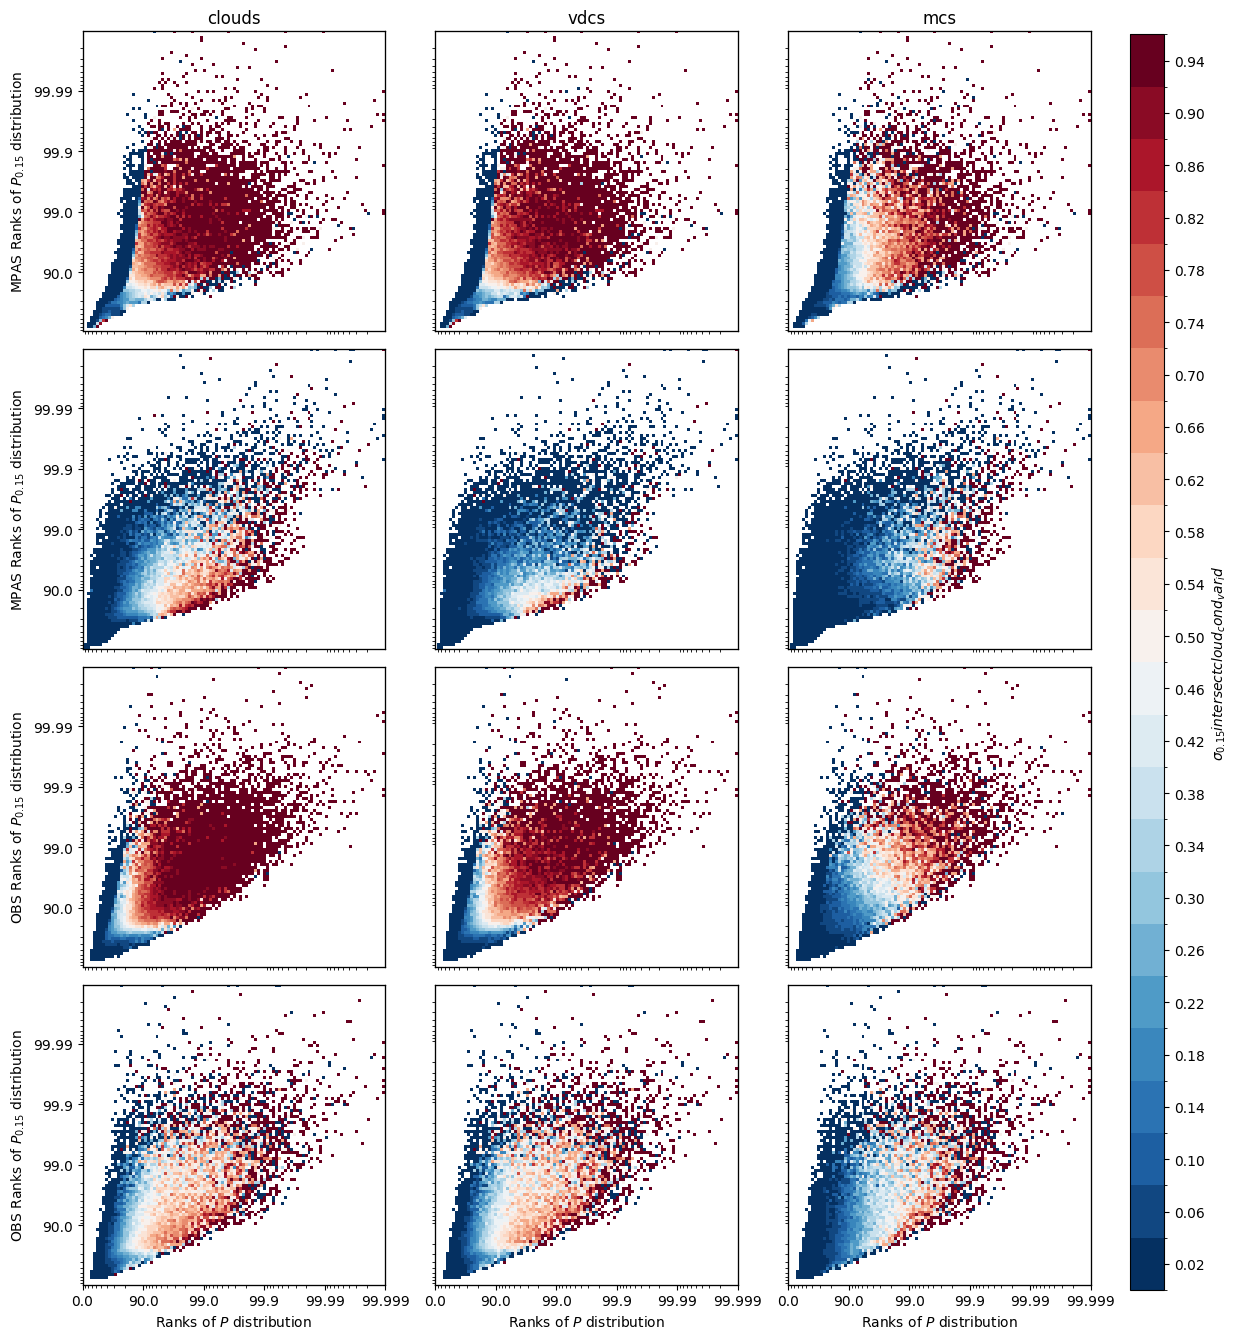

In [9]:
fig, axs  = plt.subplots(4, 3, figsize = (1.419*8, 1.5*9)) #, sharex=True, sharey=True)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.01, hspace=0.01)

cloud_cond_var_ids = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]

cmap = plt.cm.RdBu_r
values_and_boundaries = np.arange(0, 1, 0.02)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

for i, jd, gr, axes in zip(range(len(jds)), jds, grs, axs):
    print(jd.name)
    for j, cloud_cond_var_id, ax in zip(range(len(axes)), cloud_cond_var_ids, axes):
        if i == 0 : 
            title = cloud_cond_var_id.split("_")[0]
        else : 
            title = None
            
        ax, cbar, ax_show, density = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title=title,  func = 'intersection_over_half_intersection', mask = 'all', cmap = cmap, norm = norm, fig = fig, ax = ax)
        cbar.remove()
        # plot_smoothed_density_contours(density, [0.2, 0.8], fig, ax_show)

        if title is None:
            ax.set_title("")
        # ax.set_title(r"$\rho_{0.5} $ for joint bins of $(P; P_{0.5})$")
        if j == 0:
            ax.set_ylabel(jd.name.split("_")[0] + r" Ranks of $P_{0.15}$ distribution")
        else:
            ax.set_ylabel("")
            ax.tick_params(left=False, labelleft=False)
        if i == len(jds) - 1:
            ax.set_xlabel(r"Ranks of $P$ distribution")
        else:
            ax.set_xlabel("")
            ax.tick_params(bottom=False, labelbottom=False)

# plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.tight_layout()
cax = fig.add_axes([1, 0.04, 0.03, 0.93])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=values, spacing='proportional')
cbar.set_label(r'$\sigma_{0.15} intersect cloud_cond_var_id$')
# plt.savefig("figures/fig4.png")
        # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')
        # # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')

In [5]:
### MCS contributions to extremes
jd_obs, gr_obs = jds[0], grs[0]
mcs_15 = gr_obs.get_var_id_ds("mcs_cond_prec_15")
# mcs_15.intersection_over_half_intersection_mcs_cond_prec_15
# mcs_15.intersection_mcs_cond_prec_15
mcs_15_on_jdist = jd_obs.compute_conditional_data_over_density(mcs_15.intersection_over_half_intersection_mcs_cond_prec_15)
print(np.nanmean(mcs_15_on_jdist[jd_obs.dist1.ranks>99, :]))
print(np.nanmean(mcs_15_on_jdist[:, jd_obs.dist2.ranks>99]))

0.8219137110646848
0.6454510482603231


# Section Suplementary 

In [11]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
# "settings/arpege_summer_30d.yaml",
#"settings/fv3_summer_30d.yaml"  ,
settings_paths = [                     
                "settings/obs_summer_30d.yaml", 
                # "settings/arpege_summer_30d.yaml", 
                        "settings/fv3_summer_30d.yaml", "settings/ifs_summer_30d.yaml", 
                "settings/mpas_summer_30d.yaml", 
                    "settings/nicam_summer_30d.yaml", 
                # "settings/sam_summer_30d.yaml", 
                    "settings/um_summer_30d.yaml"
                    ]
# settings_paths = ["settings/nicam_summer_30d.yaml",  "settings/um_summer_30d.yaml"]
# settings_paths = [ "settings/sam_4km_30min_30d.yaml"]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 40,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /homedata/mcarenso/tempest/OBS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/FV3_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/IFS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/NICAM_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/UM_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/FV3_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/IFS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/NICAM_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/UM

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


OBS_lowRes_Tropics
FV3_lowRes_Tropics
IFS_lowRes_Tropics
NICAM_lowRes_Tropics
UM_lowRes_Tropics


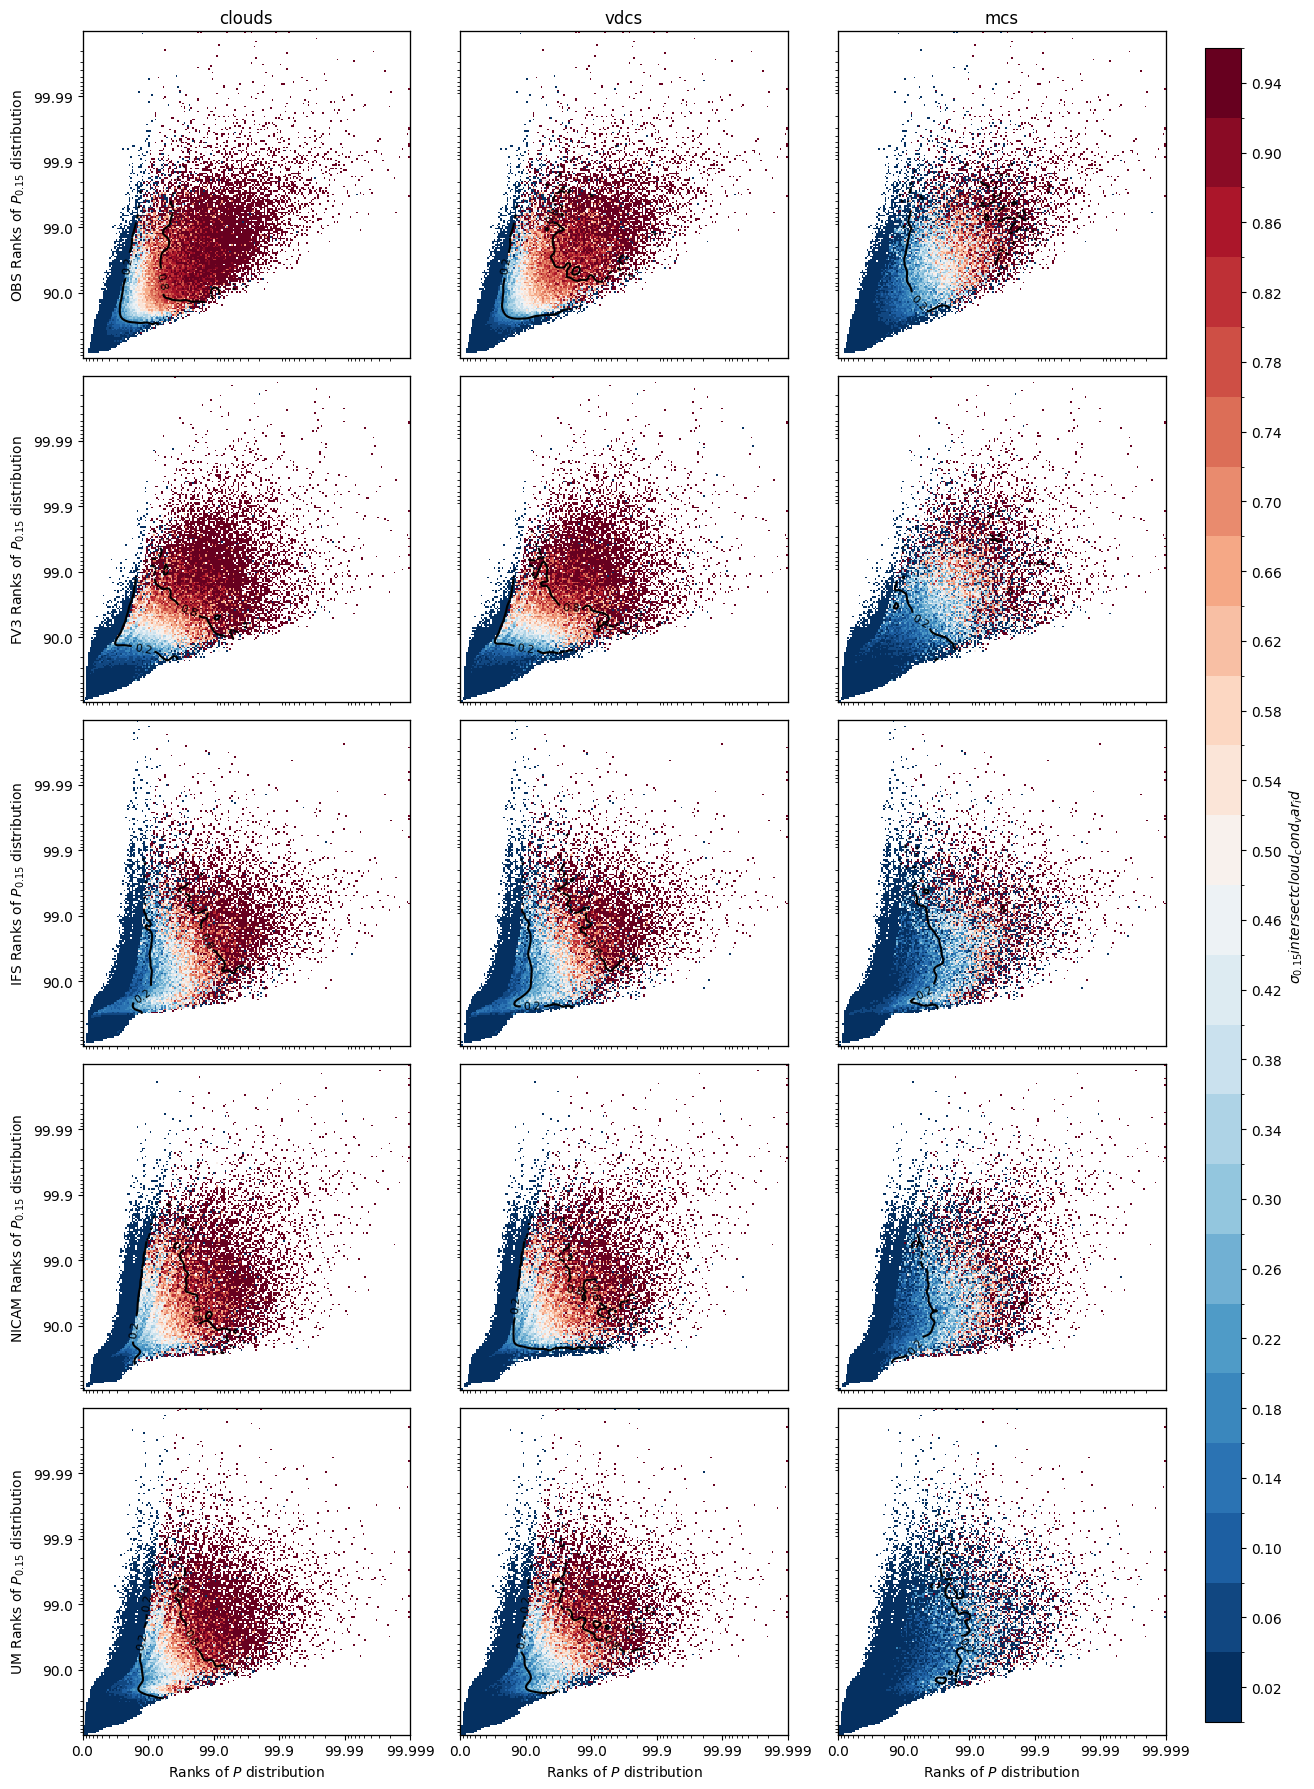

In [27]:
import pickle 
import os 

fig, axs = plt.subplots(5, 3, figsize=(12.1, 18))  # , sharex=True, sharey=True)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.01, hspace=0.01)

cloud_cond_var_ids = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]

cmap = plt.cm.RdBu_r
values_and_boundaries = np.arange(0, 1, 0.02)
values = values_and_boundaries[1::2]
boundaries = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

def save_density(density, filename):
    with open(filename, 'wb') as f:
        pickle.dump(density, f)

def load_density(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

for i, (jd, gr, axes) in enumerate(zip(jds, grs, axs)):
    print(jd.name)
    for j, (cloud_cond_var_id, ax) in enumerate(zip(cloud_cond_var_ids, axes)):
        if i == 0: 
            title = cloud_cond_var_id.split("_")[0]
        else: 
            title = None
        
        density_filename = f'density_{jd.name}_nbpd_{jd.nbpd}_nd_{jd.nd}_{cloud_cond_var_id}.pkl'
        
        if os.path.exists(density_filename):
            density = load_density(density_filename)
            ax, cbar, ax_show, density = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title=title, func='intersection_over_half_intersection', 
                                                                        mask="all", cmap=cmap, norm=norm, fig=fig, ax=ax,
                                                                        density = density
                                                                        )

        else:
            ax, cbar, ax_show, density = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title=title, func='intersection_over_half_intersection', mask="all", cmap=cmap, norm=norm, fig=fig, ax=ax)
            save_density(density, density_filename)
        
        cbar.remove()
        # plot_smoothed_density_contours(density, [0.2, 0.8], fig, ax_show)

        if title is None:
            ax.set_title("")
        if j == 0:
            ax.set_ylabel(jd.name.split("_")[0] + r" Ranks of $P_{0.15}$ distribution")
        else:
            ax.set_ylabel("")
            ax.tick_params(left=False, labelleft=False)
        if i == len(jds) - 1:
            ax.set_xlabel(r"Ranks of $P$ distribution")
        else: 
            ax.set_xlabel("")
            ax.tick_params(bottom=False, labelbottom=False)

plt.tight_layout()
cax = fig.add_axes([1, 0.04, 0.03, 0.93])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=values, spacing='proportional')
cbar.set_label(r'$\sigma_{0.15} intersect cloud_cond_var_id$')
# plt.savefig("figures/fig4.png")
        # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')
        # # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')

# get that contours


In [3]:
def get_var_id_density_over_jdist(self, var_id, func, mask, cmap = plt.cm.viridis, title = "No title :( "):
    key = func+'_'+var_id
        # Trying to avoid the prec bug, maybe it's due to prec dataset already being open within jd
    if var_id == self.var_id : 
        ds_var = self.prec.sortby("days")[key]
    elif func == 'MCS':
        ds_var = self.grid.get_var_id_ds(self.st_label_var_id).sortby("days")[var_id]
    else :  
        ds_var = self.grid.get_var_id_ds(var_id).sortby("days")[key]
        
    var_days = list(ds_var.days.values)
    ds_var = ds_var.sel(days = var_days) #.where(mask) # redundant ? 
    var_over_density = self.compute_conditional_data_over_density(ds_var, mask = mask, plot_func = np.nanmean) #more a da than ds but whatever
    
    return var_over_density 

In [4]:
cloud_cond_var_ids = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]
cloud_cond_var_id = cloud_cond_var_ids[1]
cmap = plt.cm.RdBu_r
values_and_boundaries = np.arange(0, 1, 0.02)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

jd = jds[1] 

density = get_var_id_density_over_jdist(jd, var_id = cloud_cond_var_id, title="None",  func = 'intersection_over_half_intersection', mask = "all") #mask = np.repeat(np.logical_or(~ocean, ocean), 30, axis=2)

NameError: name 'jds' is not defined

## smoothed density func

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from numpy import ma
from skimage.restoration import inpaint

def plot_smoothed_density_contours(density, levels = [0.2, 0.8], fig =None, ax = None):
    # Example data array (replace this with your actual data array)
    data = density.T

    # smooth data and handles nan
    masked_data = ma.masked_invalid(data)
    inpaint_mask = np.isnan(data)
    inpainted_data = inpaint.inpaint_biharmonic(data, inpaint_mask)
    smoothed_data = gaussian_filter(inpainted_data, sigma=2)
    smoothed_data = np.where(np.isnan(data), np.nan, smoothed_data)

    # Define contour levels
    if fig is None and ax is None : fig, ax = plt.subplots(figsize=(10, 10))
    contours = ax.contour(smoothed_data, levels=levels, colors='black')
    ax.clabel(contours, inline=True, fontsize=8)

## create intersection

In [10]:
# import os 
# for  gr in grs:
#     cloud_types = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]
#     cloud_cond_var_ids = ["intersection_clouds_cond_prec_15", "intersection_vdcs_cond_prec_15", "intersection_mcs_cond_prec_15"]
#     for cloud_cond_var_id, cloud_type in zip(cloud_cond_var_ids, cloud_types):
#         mcs_cond = gr.get_var_id_ds(cloud_type)
#         bool_covered = mcs_cond[cloud_cond_var_id]>0.5
#         mcs_cond["intersection_over_half_"+cloud_cond_var_id] = bool_covered ## add this 
#         mcs_cond_file = gr.get_var_ds_file(cloud_type)
#         os.remove(mcs_cond_file)
#         mcs_cond.to_netcdf(mcs_cond_file)

## reload storms (long)

In [14]:
# for gr in grs:
#     print(gr.casestudy)
#     st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = True, overwrite = False)
#     st = storm_tracker.StormTracker(gr, label_var_id = "MCS_Feng", overwrite_storms = True, overwrite = False)


< Tempest instance:
 . handler: <tempest.handler.Handler object at 0x1541853703d0>
 . settings: <class 'dict'>
 . verbose: True
 . overwrite: True
 . region: Tropics
 . model: FV3_lowRes
 . name: FV3_lowRes_Tropics
 . data_out: /homedata/mcarenso/tempest/FV3_lowRes_Tropics
 . i_t_min: 240
 . i_t_max: 960
 . range_t: range(240, 961)
 . lat_slice: slice(-30, 30, None)
 . lon_slice: slice(-180, 180, None)
 . days_i_t_per_var_id: <class 'dict'>
 . var_names_2d: ['pr', 'flut']
 . var_names_3d: []
 . variables_names: <class 'list'>
 . new_variables_names: <class 'list'>
 . new_var_dependencies: <class 'dict'>
 . new_var_functions: <class 'dict'>
 >


IndexError: list index out of range